# 02 - Simple Liner Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.3.0


# Hypothesis and Cost
### Hypothesis
>- $ H(x) = Wx + b $

### Cost
>- $ cost(W) = \frac{1}{m} \sum_{i=1}^{m}{{(W{x}^{i}-y^{i})}^2} $

In [2]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

(0.0, 6.0)

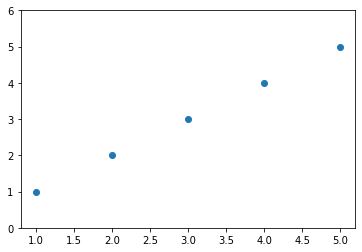

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data, y_data, 'o')
plt.ylim(0,6)

### Hypothesis

In [18]:
v =[1., 2., 3., 4.]
print(tf.reduce_min(v)) 
print(tf.square(v))

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor([ 1.  4.  9. 16.], shape=(4,), dtype=float32)


In [25]:
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

W.numpy(), b.numpy(), hypothesis.numpy()

(2.0, 0.5, array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32))

(0.0, 8.0)

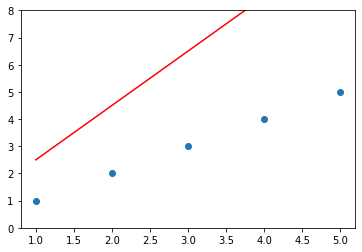

In [27]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

### Cost

In [50]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
W_grad, b_grad = tape.gradient(cost, [W,b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

### Update parameters

In [51]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad) # W -= learning_rate * W_grad
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

(0.0, 8.0)

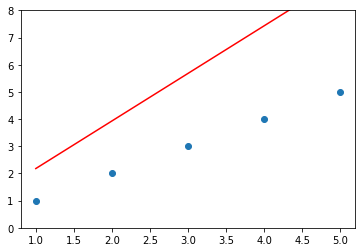

In [53]:
hypothesis = W * x_data + b
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

### 여러 번 반복

    0|    2.5000|    0.8600| 57.000000
  100|    0.9185|    0.2942|  0.015866
  200|    0.9419|    0.2097|  0.008060
  300|    0.9586|    0.1495|  0.004094
  400|    0.9705|    0.1065|  0.002080
  500|    0.9790|    0.0759|  0.001056
  600|    0.9850|    0.0541|  0.000537
  700|    0.9893|    0.0386|  0.000273
  800|    0.9924|    0.0275|  0.000138
  900|    0.9946|    0.0196|  0.000070


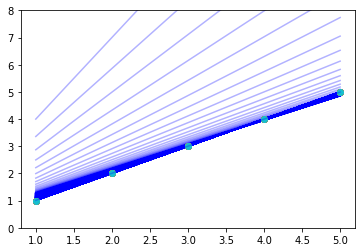

In [70]:
W = tf.Variable(3.0)
b = tf.Variable(1.0)

for _ in range(1000):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W,b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, hypothesis.numpy(), 'b-',alpha = 0.3)
    plt.ylim(0, 8)
    
    if _ % 100 == 0 :
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(_, W.numpy(), b.numpy(), cost))

### predict

In [71]:
print(W * 5 + b)

tf.Tensor(4.994607, shape=(), dtype=float32)
